In [55]:
import collections
import pandas as pd
import numpy as np
train = pd.read_csv('../open/train.csv')
test = pd.read_csv('../open/test.csv')

train_list = list(train.질문_1)+list(train.질문_2)
test_list  = list(test.질문)

# def tokenize(sentence):
#     """
#     입력 문장을 토큰으로 분리합니다.

#     Args:
#         sentence: 문자열

#     Returns:
#         토큰 리스트
#     """
#     return sentence.lower().split()

def count_tokens(token_list):
    """
    토큰 리스트의 분포를 계산합니다.

    Args:
        token_list: 토큰 리스트

    Returns:
        토큰 분포 딕셔너리
    """
    token_counts = collections.Counter(token_list)
    return token_counts

from transformers import AutoTokenizer
model_ckpt = 'sentence-transformers/distiluse-base-multilingual-cased-v1'
tokenize = AutoTokenizer.from_pretrained(model_ckpt) # 사용하는 토크나이저
# 문장 토큰화
train_tokens = []
for sentence in train_list:
    train_tokens.extend(tokenize(sentence)['input_ids'])
    
test_tokens = []
for sentence in test_list:
    test_tokens.extend(tokenize(sentence)['input_ids'])

print(len(train_tokens),len(test_tokens))

# 토큰 분포 계산
train_counts = count_tokens(train_tokens)
test_counts = count_tokens(test_tokens)

train_key = list(train_counts.keys())
train_val = list(train_counts.values())

test_key = list(test_counts.keys())
test_val = list(test_counts.values())

len(set(train_key)-set(test_key)),len(set(test_key)-set(train_key)),len(set(train_key))


23902 4768


(354, 47, 975)

(array([594., 111.,  69.,  37.,  29.,  30.,  19.,  11.,   6.,   7.,   8.,
          3.,   5.,   3.,   4.,   3.,   3.,   1.,   5.,   0.,   1.,   0.,
          2.,   3.,   1.,   1.,   0.,   1.,   1.,   1.,   1.,   0.,   1.,
          2.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  1.  ,   8.33,  15.66,  22.99,  30.32,  37.65,  44.98,  52.31,
         59.64,  66.97,  74.3 ,  81.63,  88.96,  96.29, 103.62, 110.95,
        118.28, 125.61, 132.94, 140.27, 147.6 , 154.93, 162.26, 169.59,
        176.92, 184.25, 191.58, 198.91, 206.24, 213.57, 220.9 , 228.23,
        235.56, 242.89, 250.22

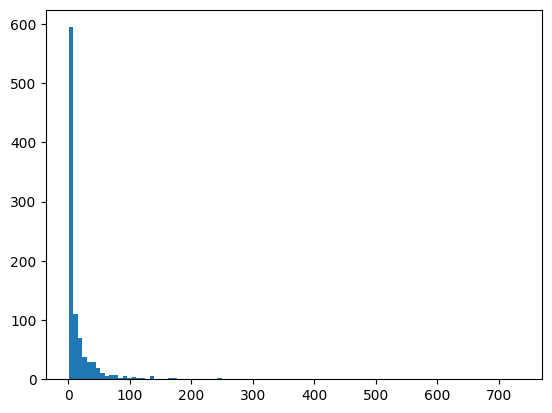

In [56]:
import matplotlib.pyplot as plt
train_val.remove(1288)
train_val.remove(1288)
train_val.remove(1138)
plt.hist(train_val,bins=100)

(array([450.,  92.,  39.,  24.,  11.,  13.,  10.,   4.,   5.,   1.,   4.,
          3.,   2.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.  ,   4.96,   8.92,  12.88,  16.84,  20.8 ,  24.76,  28.72,
         32.68,  36.64,  40.6 ,  44.56,  48.52,  52.48,  56.44,  60.4 ,
         64.36,  68.32,  72.28,  76.24,  80.2 ,  84.16,  88.12,  92.08,
         96.04, 100.  , 103.96, 107.92, 111.88, 115.84, 119.8 , 123.76,
        127.72, 131.68, 135.64, 139.6 , 143.56, 147.52, 151.48, 155.44,
        159.4 , 163.36, 167.32, 171.28, 175.24, 179.2 , 183.16, 187.12,
        191.08, 195.04, 199.  ]),
 <BarContainer object of 50 artists>)

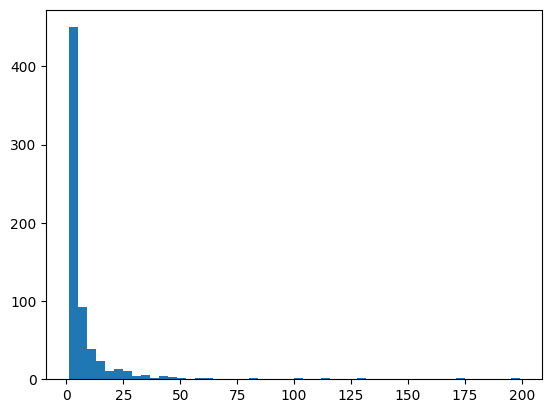

In [58]:
plt.hist(test_val,bins=50)